In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import fetch_openml
import numpy as np
from Plotter import *
from FFNN import FFNN

In [2]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X = mnist.data
y = mnist.target.astype(np.int32)

np.random.seed(42)
indices = np.random.choice(len(X), 20000, replace=False)
X = X[indices]
y = y[indices]

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

y_one_hot = np.zeros((len(y), 10))
y_one_hot[np.arange(len(y)), y] = 1

X_train, X_temp, y_train, y_temp = train_test_split(X, y_one_hot, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

plotter = Plotter()

In [15]:
ffnn1 = FFNN(
    input_size=784,
    hidden_sizes=[256, 128],
    output_size=10,
    learning_rate=0.001,
    hidden_activations=['linear', 'linear'],
    output_activation='softmax',
    loss_function='cce',
    reg_type='l2',
    reg_lambda=0.001,
    rms_norm=True,
    init_type='he',
    seed=69420
)
ffnn1.train(X_train, y_train, X_val, y_val, epochs=20, batch_size=32, verbose=1)

correct = 0
for inputs, target in zip(X_test, y_test):
    prediction = ffnn1.predict(inputs)
    predicted_class = np.argmax(prediction)
    actual_class = np.argmax(target)
    if predicted_class == actual_class:
        correct += 1

print(f"Akurasi: {correct / len(y_test) * 100:.2f}%")

Epoch 1/20: 100%|█████████████████████████████████████| 438/438 [01:51<00:00,  3.93it/s, loss=0.204]


Train Loss: 0.2039 - Val Loss: 0.0954


Epoch 2/20: 100%|████████████████████████████████████| 438/438 [01:50<00:00,  3.98it/s, loss=0.0779]


Train Loss: 0.0779 - Val Loss: 0.0682


Epoch 3/20: 100%|████████████████████████████████████| 438/438 [01:54<00:00,  3.84it/s, loss=0.0663]


Train Loss: 0.0663 - Val Loss: 0.0640


Epoch 4/20: 100%|████████████████████████████████████| 438/438 [01:51<00:00,  3.95it/s, loss=0.0637]


Train Loss: 0.0637 - Val Loss: 0.0624


Epoch 5/20: 100%|████████████████████████████████████| 438/438 [01:49<00:00,  4.01it/s, loss=0.0625]


Train Loss: 0.0625 - Val Loss: 0.0614


Epoch 6/20: 100%|████████████████████████████████████| 438/438 [00:37<00:00, 11.54it/s, loss=0.0617]


Train Loss: 0.0617 - Val Loss: 0.0608


Epoch 7/20: 100%|████████████████████████████████████| 438/438 [00:04<00:00, 89.38it/s, loss=0.0611]


Train Loss: 0.0611 - Val Loss: 0.0605


Epoch 8/20: 100%|████████████████████████████████████| 438/438 [00:06<00:00, 71.38it/s, loss=0.0608]


Train Loss: 0.0608 - Val Loss: 0.0603


Epoch 9/20: 100%|███████████████████████████████████| 438/438 [00:03<00:00, 132.12it/s, loss=0.0605]


Train Loss: 0.0605 - Val Loss: 0.0601


Epoch 10/20: 100%|███████████████████████████████████| 438/438 [00:05<00:00, 82.91it/s, loss=0.0603]


Train Loss: 0.0603 - Val Loss: 0.0599


Epoch 11/20: 100%|███████████████████████████████████| 438/438 [00:05<00:00, 86.16it/s, loss=0.0601]


Train Loss: 0.0601 - Val Loss: 0.0598


Epoch 12/20: 100%|███████████████████████████████████| 438/438 [00:04<00:00, 89.97it/s, loss=0.0599]


Train Loss: 0.0599 - Val Loss: 0.0597


Epoch 13/20: 100%|███████████████████████████████████| 438/438 [00:05<00:00, 76.76it/s, loss=0.0597]


Train Loss: 0.0597 - Val Loss: 0.0596


Epoch 14/20: 100%|███████████████████████████████████| 438/438 [00:06<00:00, 71.89it/s, loss=0.0596]


Train Loss: 0.0596 - Val Loss: 0.0595


Epoch 15/20: 100%|███████████████████████████████████| 438/438 [00:05<00:00, 80.28it/s, loss=0.0594]


Train Loss: 0.0594 - Val Loss: 0.0594


Epoch 16/20: 100%|███████████████████████████████████| 438/438 [00:07<00:00, 62.47it/s, loss=0.0593]


Train Loss: 0.0593 - Val Loss: 0.0592


Epoch 17/20: 100%|███████████████████████████████████| 438/438 [00:06<00:00, 68.10it/s, loss=0.0591]


Train Loss: 0.0591 - Val Loss: 0.0591


Epoch 18/20: 100%|████████████████████████████████████| 438/438 [00:08<00:00, 50.51it/s, loss=0.059]


Train Loss: 0.0590 - Val Loss: 0.0590


Epoch 19/20: 100%|███████████████████████████████████| 438/438 [00:06<00:00, 68.50it/s, loss=0.0588]


Train Loss: 0.0588 - Val Loss: 0.0589


Epoch 20/20: 100%|██████████████████████████████████| 438/438 [00:02<00:00, 149.26it/s, loss=0.0587]


Train Loss: 0.0587 - Val Loss: 0.0589
Akurasi: 89.67%


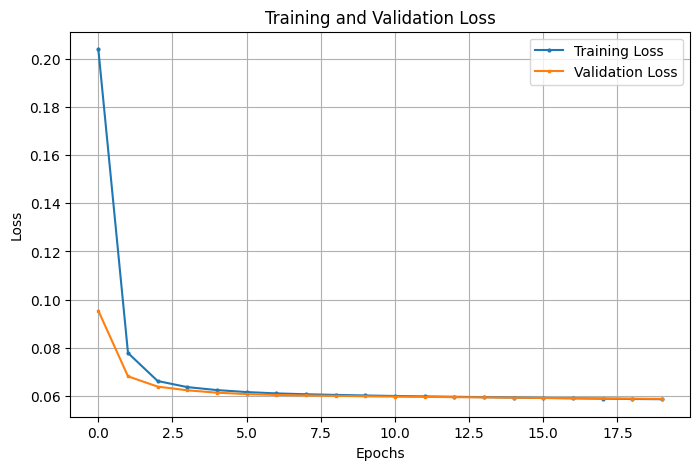

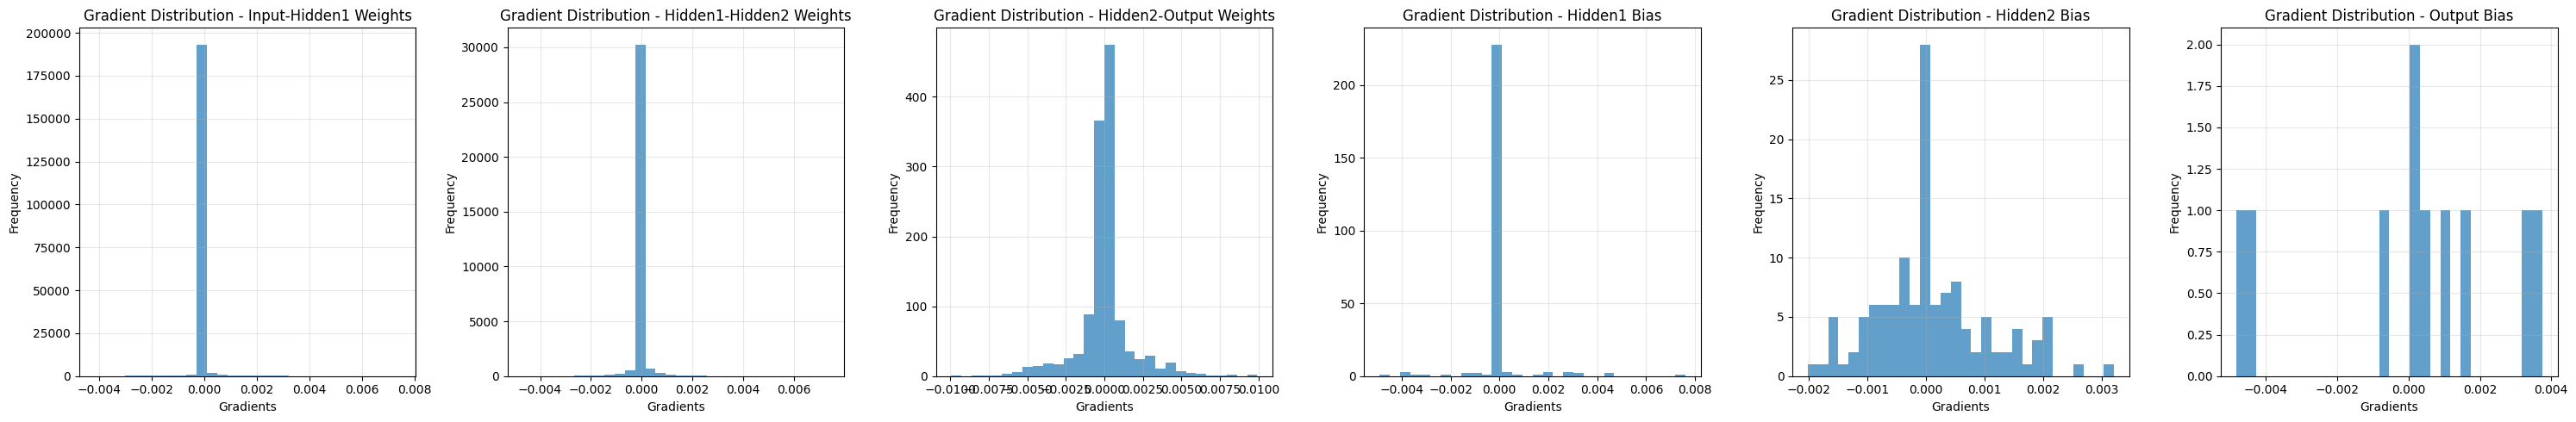

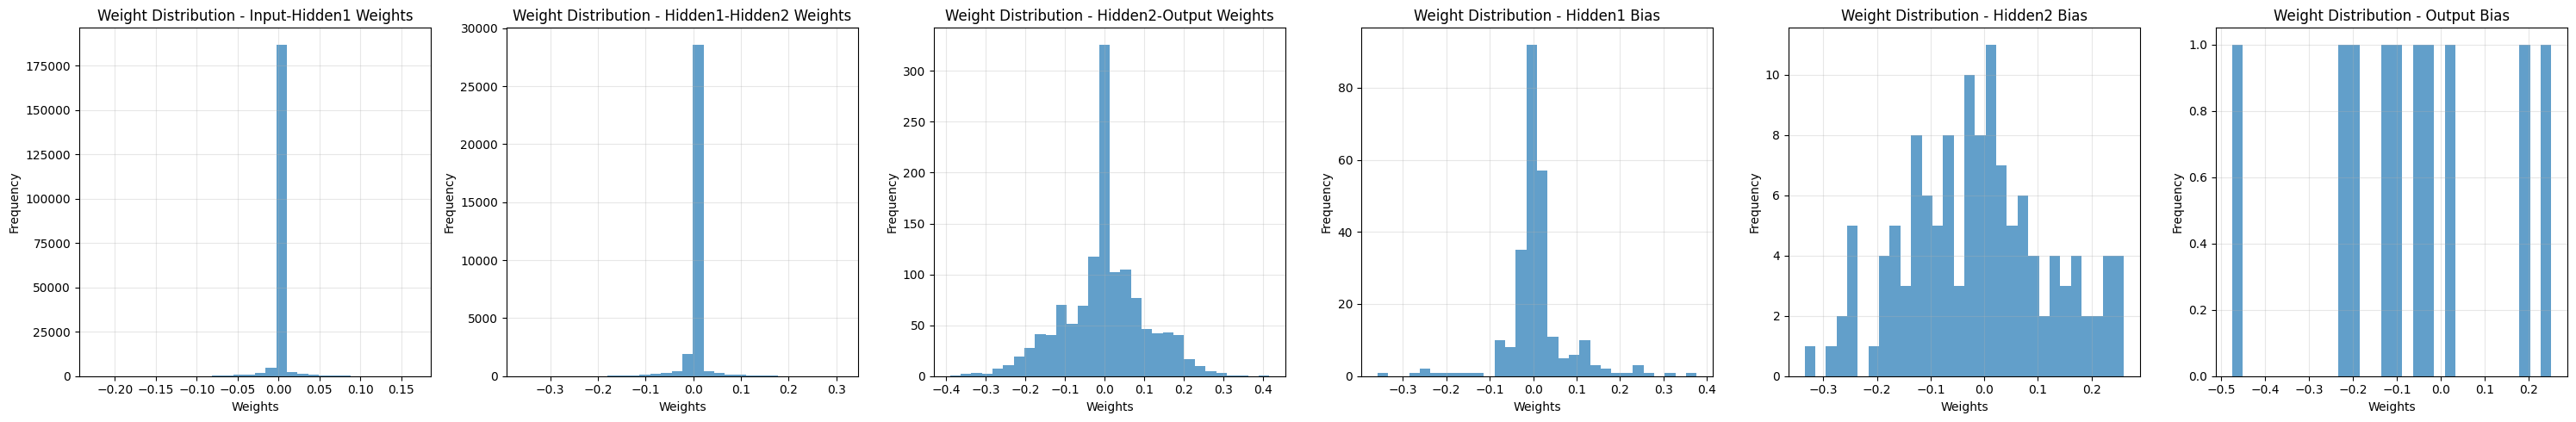

In [16]:
plotter.plot_training_history(ffnn1)
plotter.plot_gradient_distributions(ffnn1)
plotter.plot_weight_distributions(ffnn1)

In [5]:
ffnn2 = FFNN(
    input_size=784,
    hidden_sizes=[256, 128],
    output_size=10,
    learning_rate=0.001,
    hidden_activations=['relu', 'relu'],
    output_activation='softmax',
    loss_function='cce',
    reg_type='l2',
    reg_lambda=0.001,
    rms_norm=True,
    init_type='he',
    seed=69420
)
ffnn2.train(X_train, y_train, X_val, y_val, epochs=20, batch_size=32, verbose=1)

correct = 0
for inputs, target in zip(X_test, y_test):
    prediction = ffnn2.predict(inputs)
    predicted_class = np.argmax(prediction)
    actual_class = np.argmax(target)
    if predicted_class == actual_class:
        correct += 1

print(f"Akurasi: {correct / len(y_test) * 100:.2f}%")

Epoch 1/20: 100%|█████████████████████████████████████| 438/438 [00:04<00:00, 92.57it/s, loss=0.182]


Train Loss: 0.1819 - Val Loss: 0.0868


Epoch 2/20: 100%|███████████████████████████████████| 438/438 [00:04<00:00, 107.38it/s, loss=0.0739]


Train Loss: 0.0739 - Val Loss: 0.0640


Epoch 3/20: 100%|███████████████████████████████████| 438/438 [00:04<00:00, 101.24it/s, loss=0.0628]


Train Loss: 0.0628 - Val Loss: 0.0593


Epoch 4/20: 100%|████████████████████████████████████| 438/438 [00:04<00:00, 89.66it/s, loss=0.0598]


Train Loss: 0.0598 - Val Loss: 0.0576


Epoch 5/20: 100%|████████████████████████████████████| 438/438 [00:05<00:00, 84.05it/s, loss=0.0584]


Train Loss: 0.0584 - Val Loss: 0.0566


Epoch 6/20: 100%|███████████████████████████████████| 438/438 [00:01<00:00, 241.62it/s, loss=0.0575]


Train Loss: 0.0575 - Val Loss: 0.0558


Epoch 7/20: 100%|████████████████████████████████████| 438/438 [00:05<00:00, 87.10it/s, loss=0.0568]


Train Loss: 0.0568 - Val Loss: 0.0555


Epoch 8/20: 100%|███████████████████████████████████| 438/438 [00:03<00:00, 121.26it/s, loss=0.0562]


Train Loss: 0.0562 - Val Loss: 0.0551


Epoch 9/20: 100%|████████████████████████████████████| 438/438 [00:04<00:00, 95.49it/s, loss=0.0557]


Train Loss: 0.0557 - Val Loss: 0.0548


Epoch 10/20: 100%|███████████████████████████████████| 438/438 [00:04<00:00, 94.92it/s, loss=0.0553]


Train Loss: 0.0553 - Val Loss: 0.0545


Epoch 11/20: 100%|███████████████████████████████████| 438/438 [00:03<00:00, 113.24it/s, loss=0.055]


Train Loss: 0.0550 - Val Loss: 0.0544


Epoch 12/20: 100%|███████████████████████████████████| 438/438 [00:05<00:00, 87.23it/s, loss=0.0547]


Train Loss: 0.0547 - Val Loss: 0.0541


Epoch 13/20: 100%|██████████████████████████████████| 438/438 [00:01<00:00, 220.91it/s, loss=0.0544]


Train Loss: 0.0544 - Val Loss: 0.0538


Epoch 14/20: 100%|███████████████████████████████████| 438/438 [00:05<00:00, 81.14it/s, loss=0.0542]


Train Loss: 0.0542 - Val Loss: 0.0536


Epoch 15/20: 100%|███████████████████████████████████| 438/438 [00:04<00:00, 104.36it/s, loss=0.054]


Train Loss: 0.0540 - Val Loss: 0.0535


Epoch 16/20: 100%|███████████████████████████████████| 438/438 [00:04<00:00, 99.75it/s, loss=0.0538]


Train Loss: 0.0538 - Val Loss: 0.0534


Epoch 17/20: 100%|██████████████████████████████████| 438/438 [00:03<00:00, 117.00it/s, loss=0.0537]


Train Loss: 0.0537 - Val Loss: 0.0534


Epoch 18/20: 100%|███████████████████████████████████| 438/438 [00:04<00:00, 94.88it/s, loss=0.0536]


Train Loss: 0.0536 - Val Loss: 0.0533


Epoch 19/20: 100%|███████████████████████████████████| 438/438 [00:04<00:00, 97.12it/s, loss=0.0535]


Train Loss: 0.0535 - Val Loss: 0.0533


Epoch 20/20: 100%|██████████████████████████████████| 438/438 [00:02<00:00, 213.50it/s, loss=0.0534]


Train Loss: 0.0534 - Val Loss: 0.0533
Akurasi: 93.87%


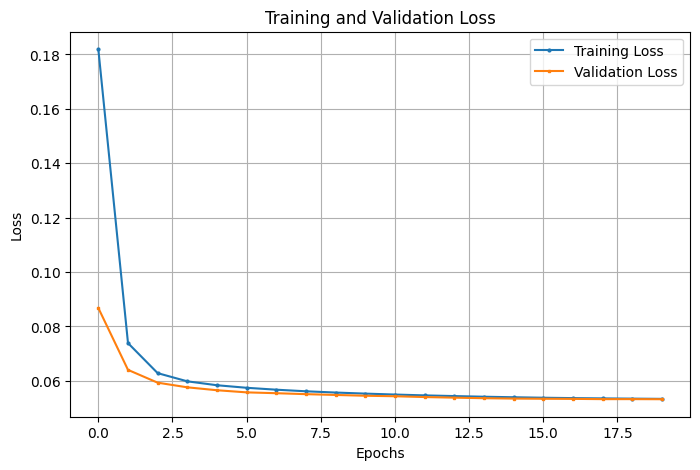

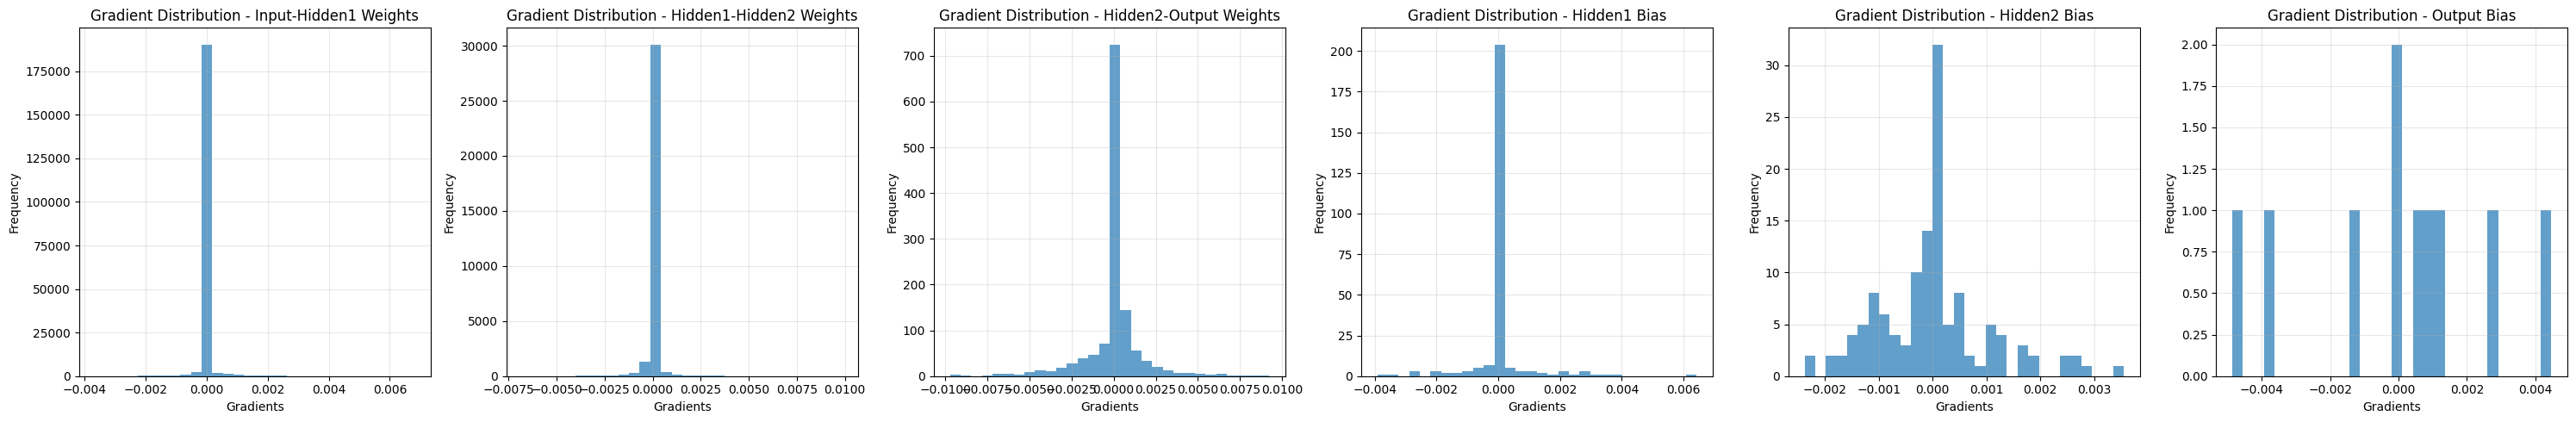

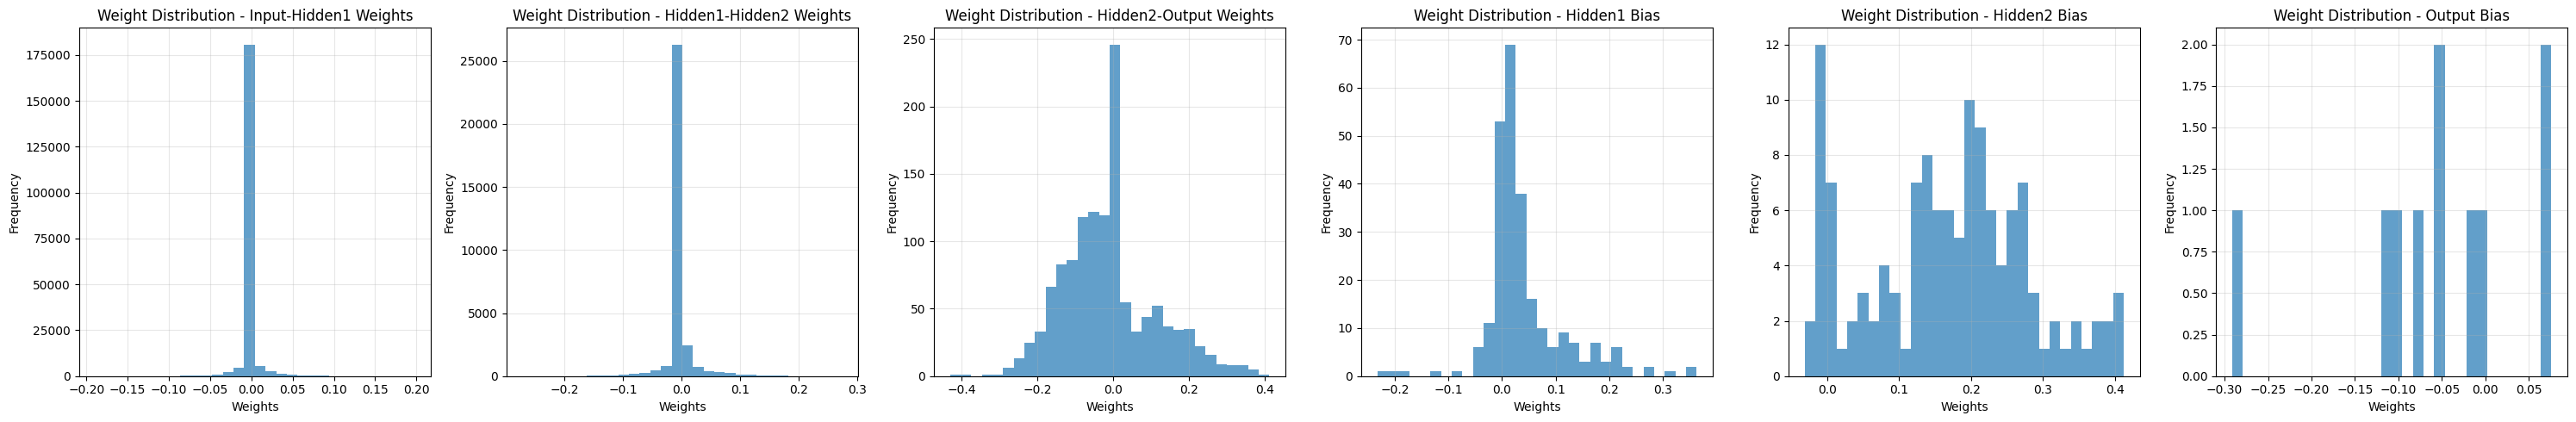

In [6]:
plotter.plot_training_history(ffnn2)
plotter.plot_gradient_distributions(ffnn2)
plotter.plot_weight_distributions(ffnn2)

In [7]:
ffnn3 = FFNN(
    input_size=784,
    hidden_sizes=[256, 128],
    output_size=10,
    learning_rate=0.001,
    hidden_activations=['sigmoid', 'sigmoid'],
    output_activation='softmax',
    loss_function='cce',
    reg_type='l2',
    reg_lambda=0.001,
    rms_norm=True,
    init_type='he',
    seed=69420
)
ffnn3.train(X_train, y_train, X_val, y_val, epochs=20, batch_size=32, verbose=1)

correct = 0
for inputs, target in zip(X_test, y_test):
    prediction = ffnn3.predict(inputs)
    predicted_class = np.argmax(prediction)
    actual_class = np.argmax(target)
    if predicted_class == actual_class:
        correct += 1

print(f"Akurasi: {correct / len(y_test) * 100:.2f}%")

Epoch 1/20: 100%|████████████████████████████████████| 438/438 [00:03<00:00, 112.24it/s, loss=0.255]


Train Loss: 0.2546 - Val Loss: 0.1634


Epoch 2/20: 100%|█████████████████████████████████████| 438/438 [00:06<00:00, 68.84it/s, loss=0.156]


Train Loss: 0.1558 - Val Loss: 0.1489


Epoch 3/20: 100%|██████████████████████████████████████| 438/438 [00:06<00:00, 68.85it/s, loss=0.15]


Train Loss: 0.1495 - Val Loss: 0.1450


Epoch 4/20: 100%|█████████████████████████████████████| 438/438 [00:06<00:00, 62.91it/s, loss=0.147]


Train Loss: 0.1475 - Val Loss: 0.1431


Epoch 5/20: 100%|████████████████████████████████████| 438/438 [00:03<00:00, 110.37it/s, loss=0.146]


Train Loss: 0.1463 - Val Loss: 0.1419


Epoch 6/20: 100%|████████████████████████████████████| 438/438 [00:01<00:00, 256.94it/s, loss=0.146]


Train Loss: 0.1455 - Val Loss: 0.1410


Epoch 7/20: 100%|█████████████████████████████████████| 438/438 [00:05<00:00, 73.33it/s, loss=0.145]


Train Loss: 0.1450 - Val Loss: 0.1405


Epoch 8/20: 100%|█████████████████████████████████████| 438/438 [00:04<00:00, 95.36it/s, loss=0.145]


Train Loss: 0.1446 - Val Loss: 0.1401


Epoch 9/20: 100%|████████████████████████████████████| 438/438 [00:04<00:00, 100.63it/s, loss=0.144]


Train Loss: 0.1443 - Val Loss: 0.1398


Epoch 10/20: 100%|████████████████████████████████████| 438/438 [00:05<00:00, 85.57it/s, loss=0.144]


Train Loss: 0.1441 - Val Loss: 0.1396


Epoch 11/20: 100%|████████████████████████████████████| 438/438 [00:06<00:00, 68.28it/s, loss=0.144]


Train Loss: 0.1440 - Val Loss: 0.1395


Epoch 12/20: 100%|███████████████████████████████████| 438/438 [00:01<00:00, 223.45it/s, loss=0.144]


Train Loss: 0.1438 - Val Loss: 0.1393


Epoch 13/20: 100%|███████████████████████████████████| 438/438 [00:04<00:00, 103.26it/s, loss=0.144]


Train Loss: 0.1437 - Val Loss: 0.1392


Epoch 14/20: 100%|███████████████████████████████████| 438/438 [00:04<00:00, 106.91it/s, loss=0.144]


Train Loss: 0.1437 - Val Loss: 0.1392


Epoch 15/20: 100%|███████████████████████████████████| 438/438 [00:04<00:00, 105.71it/s, loss=0.144]


Train Loss: 0.1436 - Val Loss: 0.1391


Epoch 16/20: 100%|███████████████████████████████████| 438/438 [00:04<00:00, 107.99it/s, loss=0.144]


Train Loss: 0.1435 - Val Loss: 0.1391


Epoch 17/20: 100%|████████████████████████████████████| 438/438 [00:04<00:00, 94.48it/s, loss=0.143]


Train Loss: 0.1435 - Val Loss: 0.1390


Epoch 18/20: 100%|████████████████████████████████████| 438/438 [00:04<00:00, 92.84it/s, loss=0.143]


Train Loss: 0.1434 - Val Loss: 0.1390


Epoch 19/20: 100%|███████████████████████████████████| 438/438 [00:02<00:00, 190.64it/s, loss=0.143]


Train Loss: 0.1434 - Val Loss: 0.1389


Epoch 20/20: 100%|████████████████████████████████████| 438/438 [00:04<00:00, 88.31it/s, loss=0.143]


Train Loss: 0.1433 - Val Loss: 0.1389
Akurasi: 80.07%


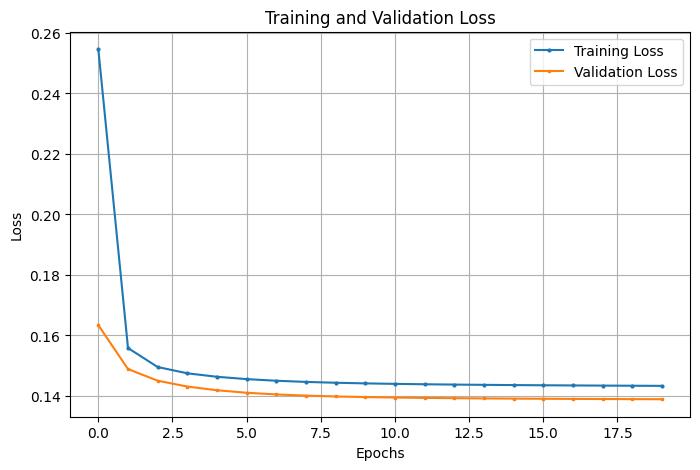

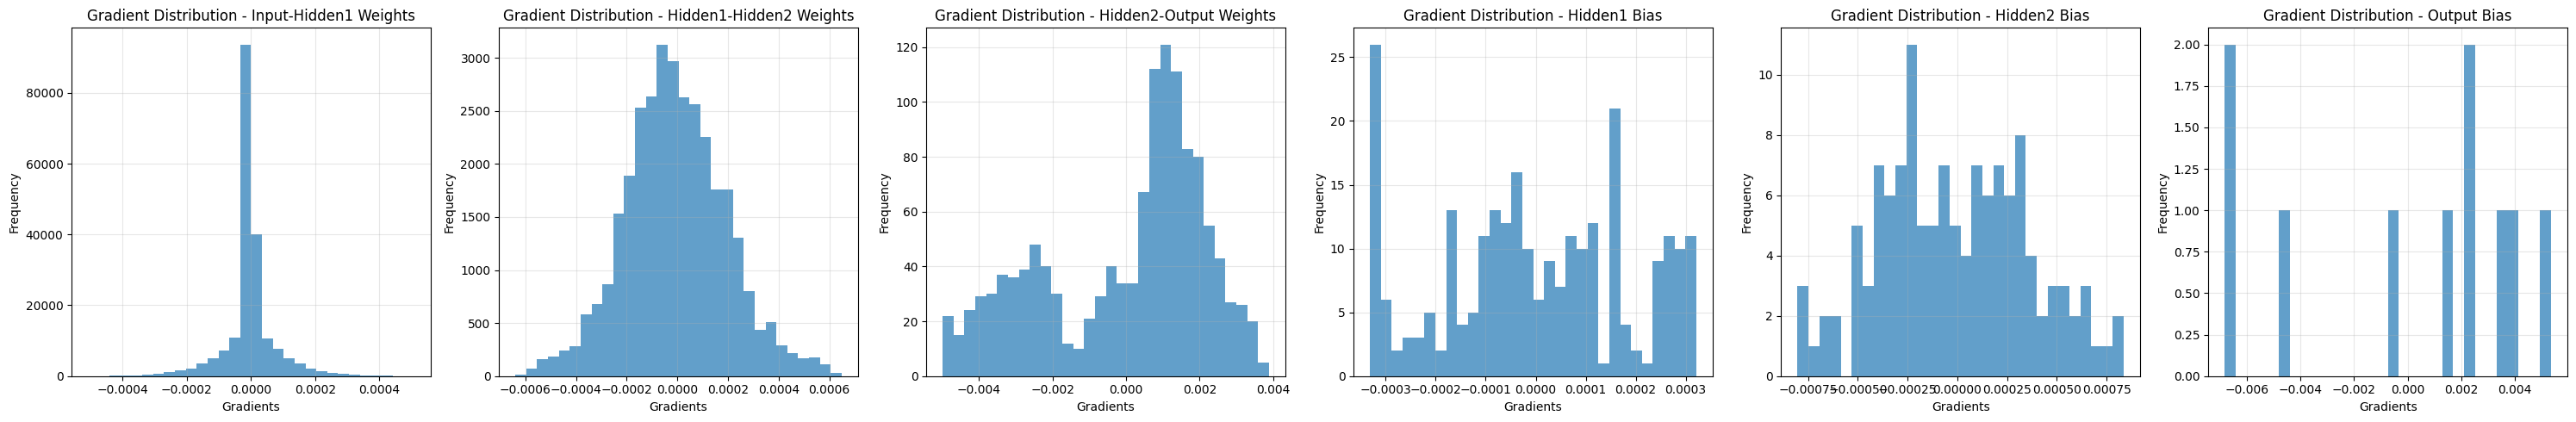

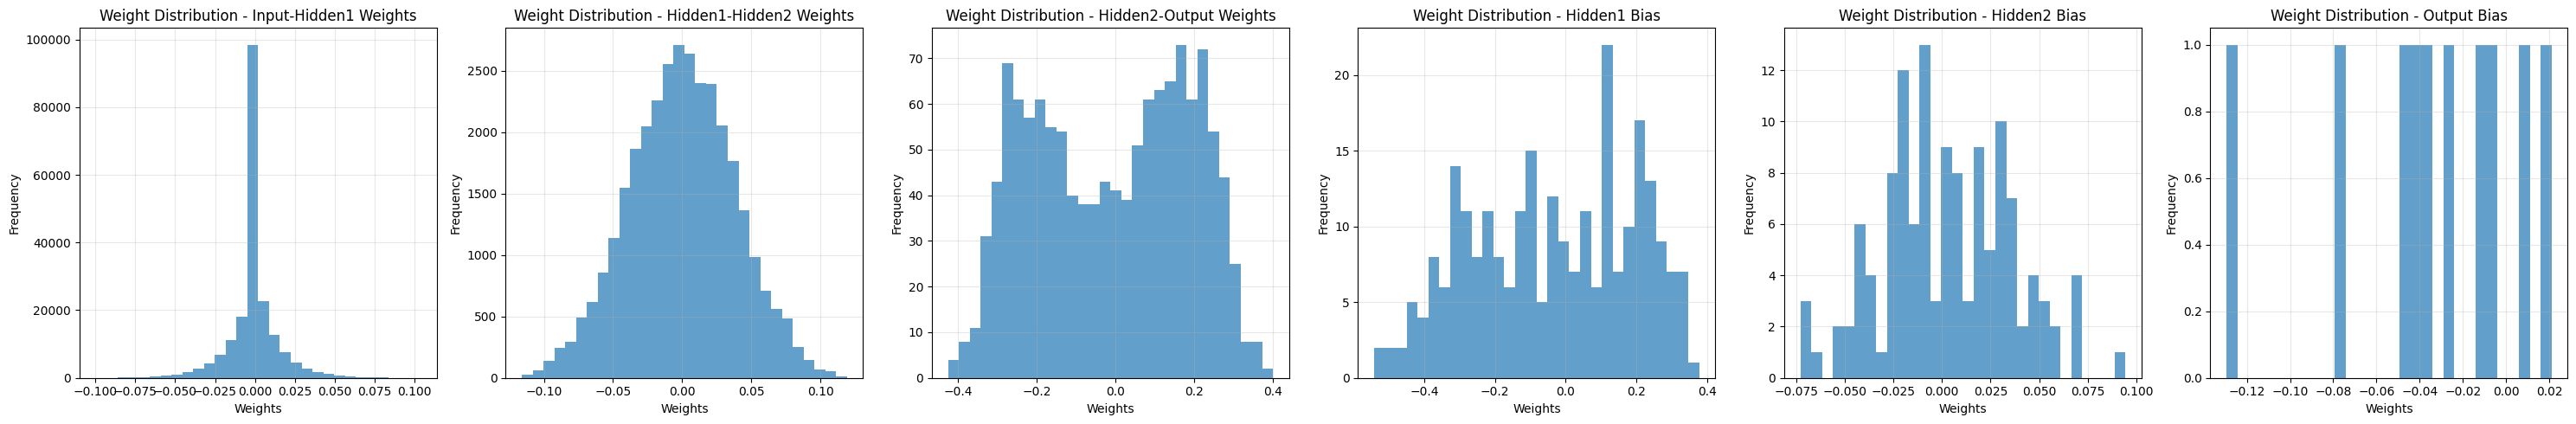

In [8]:
plotter.plot_training_history(ffnn3)
plotter.plot_gradient_distributions(ffnn3)
plotter.plot_weight_distributions(ffnn3)

In [9]:
ffnn4 = FFNN(
    input_size=784,
    hidden_sizes=[256, 128],
    output_size=10,
    learning_rate=0.001,
    hidden_activations=['tanh', 'tanh'],
    output_activation='softmax',
    loss_function='cce',
    reg_type='l2',
    reg_lambda=0.001,
    rms_norm=True,
    init_type='he',
    seed=69420
)
ffnn4.train(X_train, y_train, X_val, y_val, epochs=20, batch_size=32, verbose=1)

correct = 0
for inputs, target in zip(X_test, y_test):
    prediction = ffnn4.predict(inputs)
    predicted_class = np.argmax(prediction)
    actual_class = np.argmax(target)
    if predicted_class == actual_class:
        correct += 1

print(f"Akurasi: {correct / len(y_test) * 100:.2f}%")

Epoch 1/20: 100%|████████████████████████████████████| 438/438 [00:03<00:00, 110.24it/s, loss=0.185]


Train Loss: 0.1852 - Val Loss: 0.0871


Epoch 2/20: 100%|███████████████████████████████████| 438/438 [00:03<00:00, 113.40it/s, loss=0.0745]


Train Loss: 0.0745 - Val Loss: 0.0691


Epoch 3/20: 100%|███████████████████████████████████| 438/438 [00:03<00:00, 115.56it/s, loss=0.0666]


Train Loss: 0.0666 - Val Loss: 0.0657


Epoch 4/20: 100%|███████████████████████████████████| 438/438 [00:03<00:00, 112.00it/s, loss=0.0643]


Train Loss: 0.0643 - Val Loss: 0.0637


Epoch 5/20: 100%|███████████████████████████████████| 438/438 [00:04<00:00, 103.76it/s, loss=0.0629]


Train Loss: 0.0629 - Val Loss: 0.0623


Epoch 6/20: 100%|███████████████████████████████████| 438/438 [00:01<00:00, 305.30it/s, loss=0.0619]


Train Loss: 0.0619 - Val Loss: 0.0614


Epoch 7/20: 100%|███████████████████████████████████| 438/438 [00:03<00:00, 120.39it/s, loss=0.0612]


Train Loss: 0.0612 - Val Loss: 0.0607


Epoch 8/20: 100%|███████████████████████████████████| 438/438 [00:04<00:00, 103.86it/s, loss=0.0606]


Train Loss: 0.0606 - Val Loss: 0.0602


Epoch 9/20: 100%|███████████████████████████████████| 438/438 [00:04<00:00, 108.94it/s, loss=0.0602]


Train Loss: 0.0602 - Val Loss: 0.0598


Epoch 10/20: 100%|██████████████████████████████████| 438/438 [00:04<00:00, 108.46it/s, loss=0.0599]


Train Loss: 0.0599 - Val Loss: 0.0595


Epoch 11/20: 100%|██████████████████████████████████| 438/438 [00:03<00:00, 121.36it/s, loss=0.0596]


Train Loss: 0.0596 - Val Loss: 0.0593


Epoch 12/20: 100%|██████████████████████████████████| 438/438 [00:03<00:00, 116.11it/s, loss=0.0593]


Train Loss: 0.0593 - Val Loss: 0.0591


Epoch 13/20: 100%|███████████████████████████████████| 438/438 [00:04<00:00, 97.29it/s, loss=0.0592]


Train Loss: 0.0592 - Val Loss: 0.0590


Epoch 14/20: 100%|███████████████████████████████████| 438/438 [00:01<00:00, 221.21it/s, loss=0.059]


Train Loss: 0.0590 - Val Loss: 0.0588


Epoch 15/20: 100%|██████████████████████████████████| 438/438 [00:03<00:00, 113.13it/s, loss=0.0589]


Train Loss: 0.0589 - Val Loss: 0.0588


Epoch 16/20: 100%|██████████████████████████████████| 438/438 [00:04<00:00, 108.64it/s, loss=0.0587]


Train Loss: 0.0587 - Val Loss: 0.0587


Epoch 17/20: 100%|██████████████████████████████████| 438/438 [00:03<00:00, 123.23it/s, loss=0.0586]


Train Loss: 0.0586 - Val Loss: 0.0586


Epoch 18/20: 100%|██████████████████████████████████| 438/438 [00:04<00:00, 101.72it/s, loss=0.0585]


Train Loss: 0.0585 - Val Loss: 0.0586


Epoch 19/20: 100%|███████████████████████████████████| 438/438 [00:04<00:00, 89.47it/s, loss=0.0585]


Train Loss: 0.0585 - Val Loss: 0.0586


Epoch 20/20: 100%|███████████████████████████████████| 438/438 [00:05<00:00, 78.32it/s, loss=0.0584]


Train Loss: 0.0584 - Val Loss: 0.0585
Akurasi: 92.27%


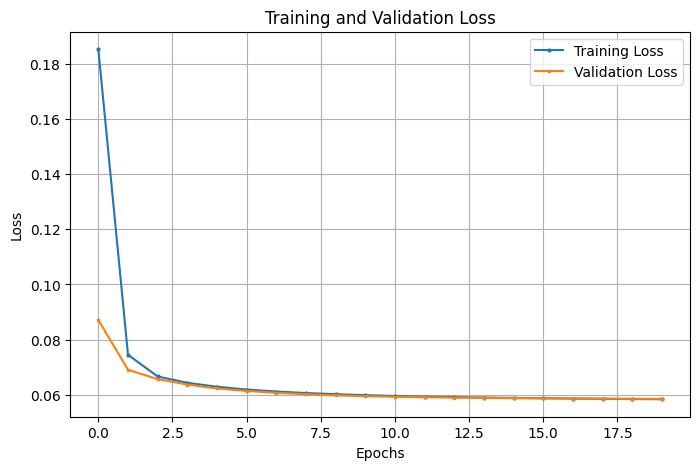

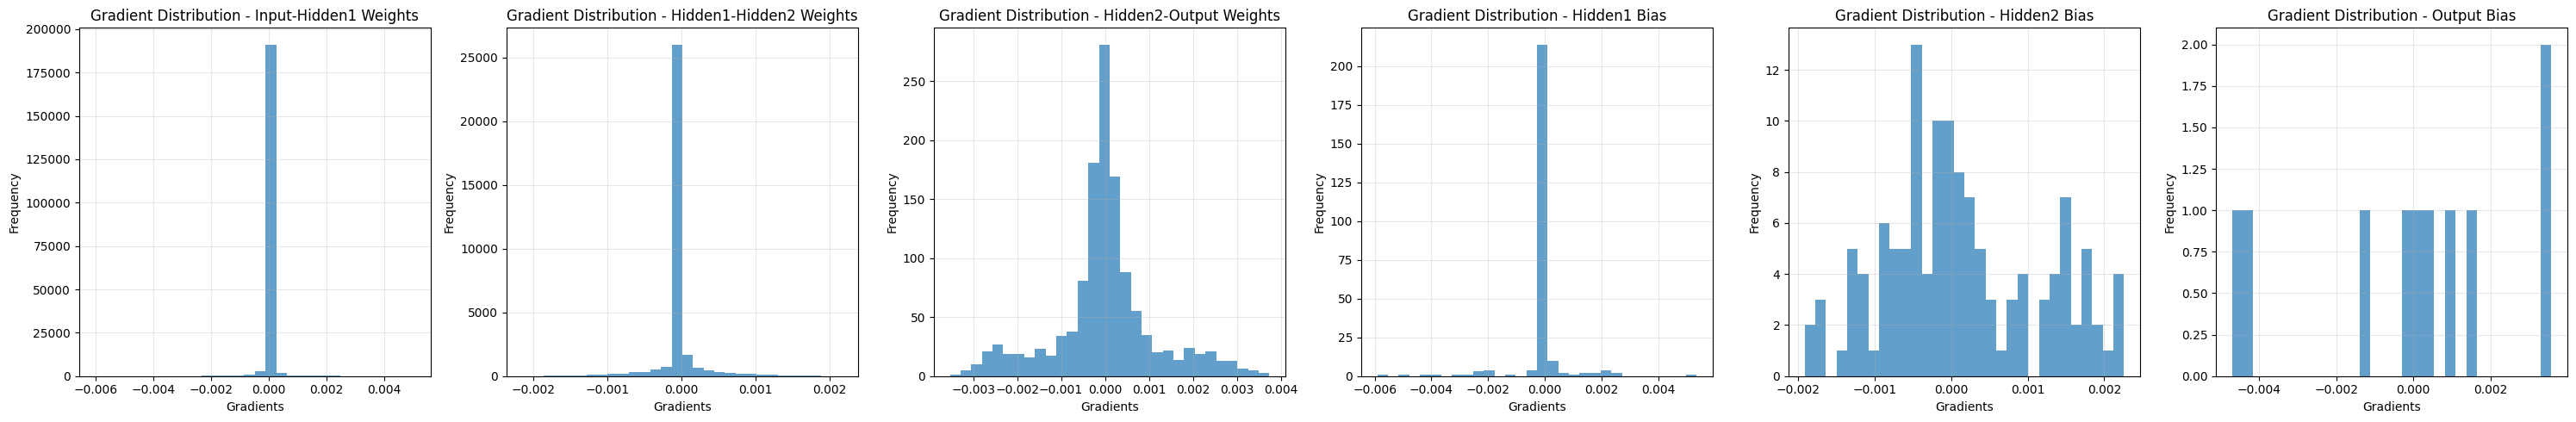

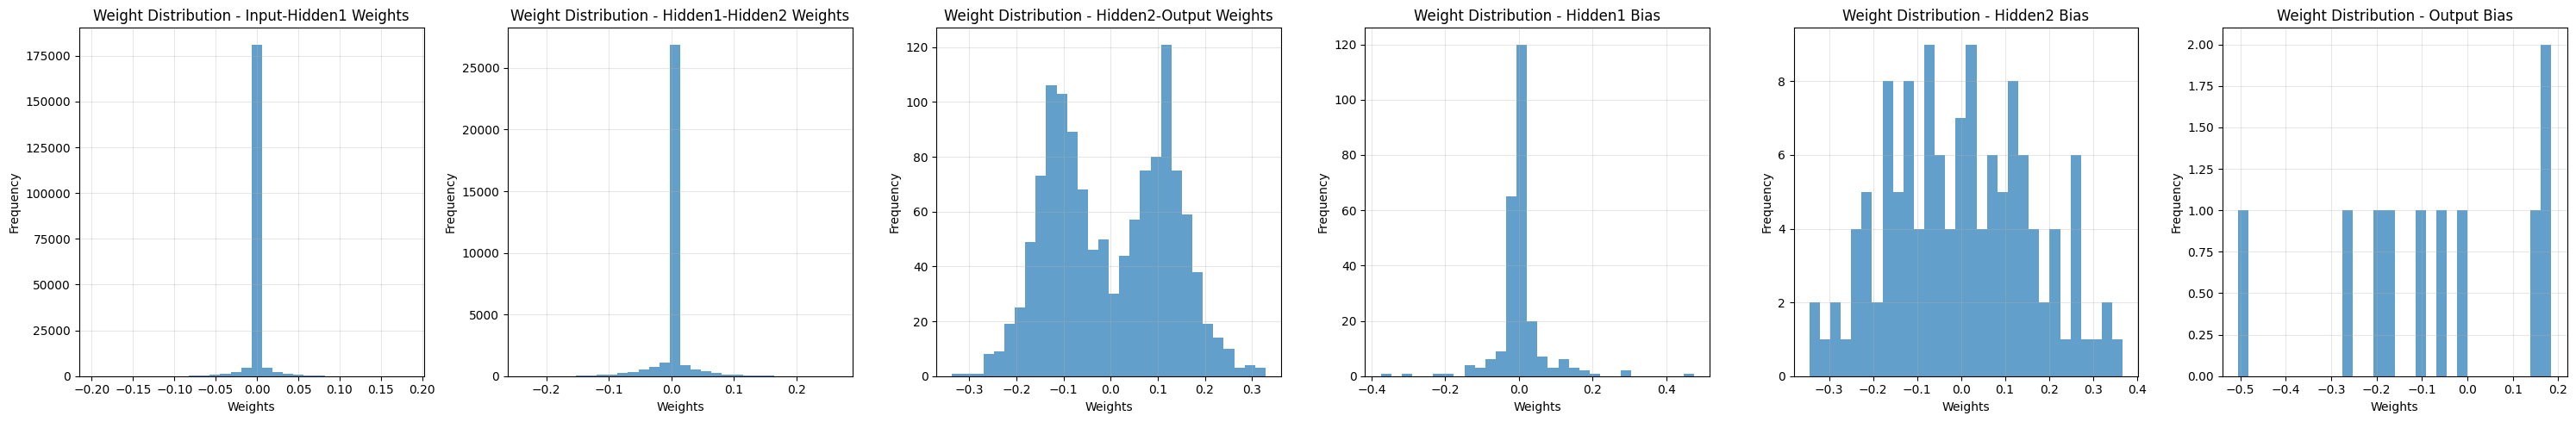

In [10]:
plotter.plot_training_history(ffnn4)
plotter.plot_gradient_distributions(ffnn4)
plotter.plot_weight_distributions(ffnn4)

In [11]:
ffnn5 = FFNN(
    input_size=784,
    hidden_sizes=[256, 128],
    output_size=10,
    learning_rate=0.001,
    hidden_activations=['leaky_relu', 'leaky_relu'],
    output_activation='softmax',
    loss_function='cce',
    reg_type='l2',
    reg_lambda=0.001,
    rms_norm=True,
    init_type='he',
    seed=69420
)
ffnn5.train(X_train, y_train, X_val, y_val, epochs=20, batch_size=32, verbose=1)

correct = 0
for inputs, target in zip(X_test, y_test):
    prediction = ffnn5.predict(inputs)
    predicted_class = np.argmax(prediction)
    actual_class = np.argmax(target)
    if predicted_class == actual_class:
        correct += 1

print(f"Akurasi: {correct / len(y_test) * 100:.2f}%")

Epoch 1/20: 100%|████████████████████████████████████| 438/438 [00:00<00:00, 806.38it/s, loss=0.182]


Train Loss: 0.1821 - Val Loss: 0.0871


Epoch 2/20: 100%|███████████████████████████████████| 438/438 [00:03<00:00, 111.72it/s, loss=0.0741]


Train Loss: 0.0741 - Val Loss: 0.0644


Epoch 3/20: 100%|███████████████████████████████████| 438/438 [00:04<00:00, 105.75it/s, loss=0.0629]


Train Loss: 0.0629 - Val Loss: 0.0594


Epoch 4/20: 100%|███████████████████████████████████| 438/438 [00:04<00:00, 100.88it/s, loss=0.0599]


Train Loss: 0.0599 - Val Loss: 0.0576


Epoch 5/20: 100%|████████████████████████████████████| 438/438 [00:04<00:00, 92.75it/s, loss=0.0585]


Train Loss: 0.0585 - Val Loss: 0.0567


Epoch 6/20: 100%|████████████████████████████████████| 438/438 [00:05<00:00, 82.07it/s, loss=0.0576]


Train Loss: 0.0576 - Val Loss: 0.0561


Epoch 7/20: 100%|███████████████████████████████████| 438/438 [00:04<00:00, 103.51it/s, loss=0.0569]


Train Loss: 0.0569 - Val Loss: 0.0554


Epoch 8/20: 100%|███████████████████████████████████| 438/438 [00:01<00:00, 250.09it/s, loss=0.0563]


Train Loss: 0.0563 - Val Loss: 0.0552


Epoch 9/20: 100%|███████████████████████████████████| 438/438 [00:03<00:00, 110.99it/s, loss=0.0559]


Train Loss: 0.0559 - Val Loss: 0.0550


Epoch 10/20: 100%|██████████████████████████████████| 438/438 [00:04<00:00, 108.30it/s, loss=0.0555]


Train Loss: 0.0555 - Val Loss: 0.0547


Epoch 11/20: 100%|██████████████████████████████████| 438/438 [00:03<00:00, 119.61it/s, loss=0.0552]


Train Loss: 0.0552 - Val Loss: 0.0544


Epoch 12/20: 100%|██████████████████████████████████| 438/438 [00:03<00:00, 114.12it/s, loss=0.0549]


Train Loss: 0.0549 - Val Loss: 0.0543


Epoch 13/20: 100%|██████████████████████████████████| 438/438 [00:03<00:00, 110.19it/s, loss=0.0547]


Train Loss: 0.0547 - Val Loss: 0.0541


Epoch 14/20: 100%|██████████████████████████████████| 438/438 [00:04<00:00, 108.82it/s, loss=0.0544]


Train Loss: 0.0544 - Val Loss: 0.0540


Epoch 15/20: 100%|██████████████████████████████████| 438/438 [00:03<00:00, 121.01it/s, loss=0.0543]


Train Loss: 0.0543 - Val Loss: 0.0538


Epoch 16/20: 100%|██████████████████████████████████| 438/438 [00:01<00:00, 290.31it/s, loss=0.0541]


Train Loss: 0.0541 - Val Loss: 0.0538


Epoch 17/20: 100%|████████████████████████████████████| 438/438 [00:07<00:00, 60.22it/s, loss=0.054]


Train Loss: 0.0540 - Val Loss: 0.0537


Epoch 18/20: 100%|███████████████████████████████████| 438/438 [00:04<00:00, 92.72it/s, loss=0.0538]


Train Loss: 0.0538 - Val Loss: 0.0537


Epoch 19/20: 100%|███████████████████████████████████| 438/438 [00:04<00:00, 90.09it/s, loss=0.0537]


Train Loss: 0.0537 - Val Loss: 0.0536


Epoch 20/20: 100%|███████████████████████████████████| 438/438 [00:06<00:00, 64.13it/s, loss=0.0536]


Train Loss: 0.0536 - Val Loss: 0.0535
Akurasi: 93.70%


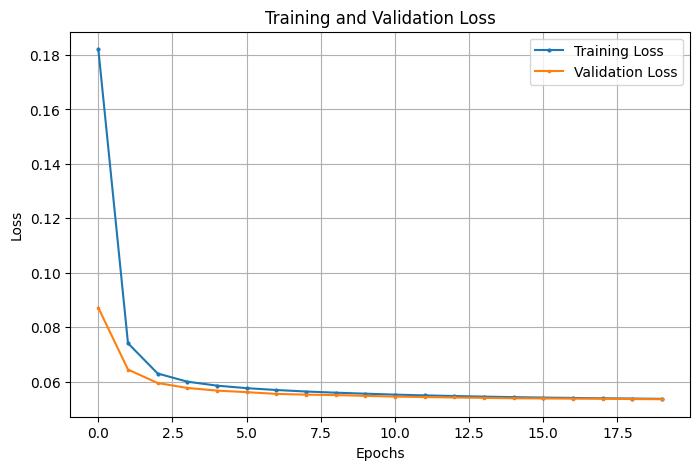

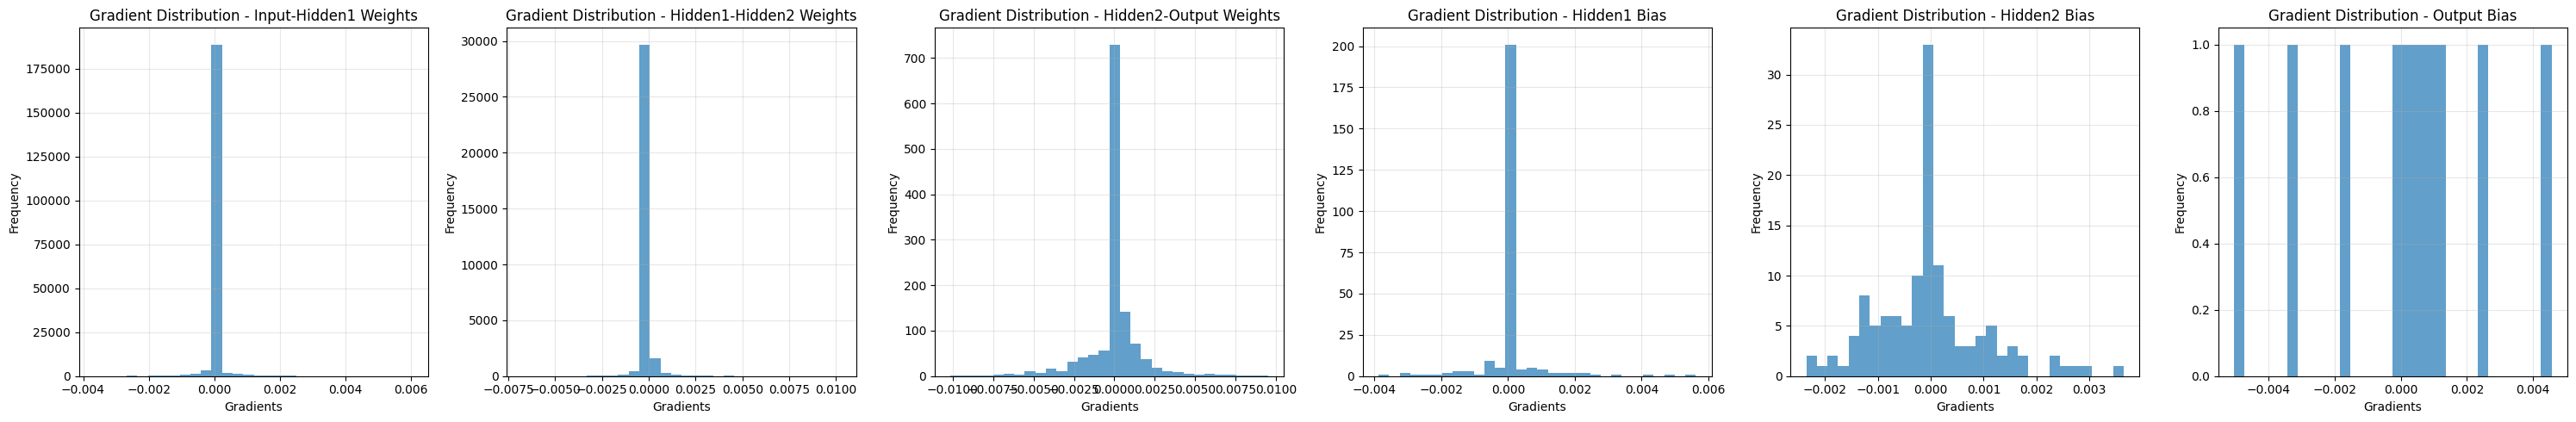

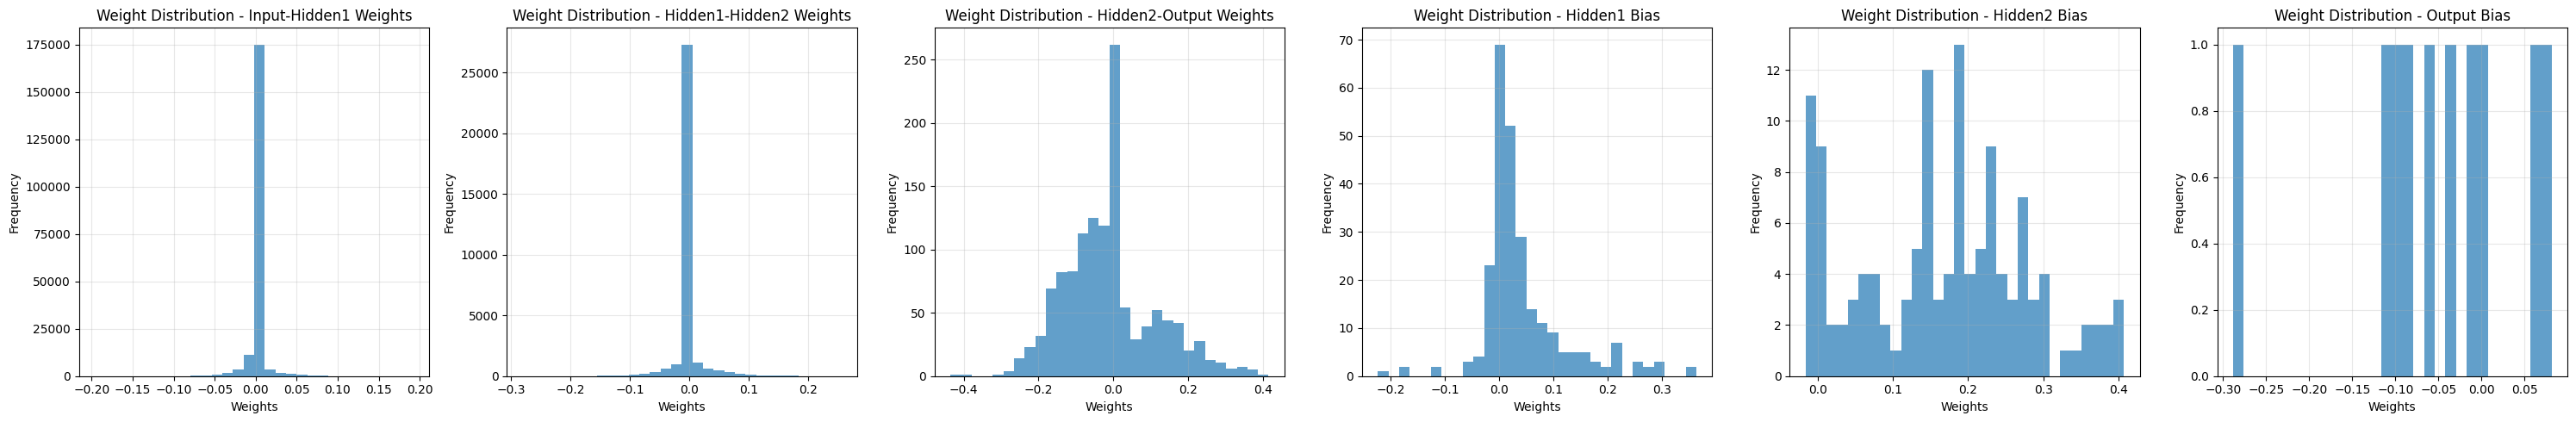

In [12]:
plotter.plot_training_history(ffnn5)
plotter.plot_gradient_distributions(ffnn5)
plotter.plot_weight_distributions(ffnn5)

In [13]:
ffnn6 = FFNN(
    input_size=784,
    hidden_sizes=[256, 128],
    output_size=10,
    learning_rate=0.001,
    hidden_activations=['elu', 'elu'],
    output_activation='softmax',
    loss_function='cce',
    reg_type='l2',
    reg_lambda=0.001,
    rms_norm=True,
    init_type='he',
    seed=69420
)
ffnn6.train(X_train, y_train, X_val, y_val, epochs=20, batch_size=32, verbose=1)

correct = 0
for inputs, target in zip(X_test, y_test):
    prediction = ffnn6.predict(inputs)
    predicted_class = np.argmax(prediction)
    actual_class = np.argmax(target)
    if predicted_class == actual_class:
        correct += 1

print(f"Akurasi: {correct / len(y_test) * 100:.2f}%")

Epoch 1/20: 100%|████████████████████████████████████| 438/438 [00:02<00:00, 174.14it/s, loss=0.191]


Train Loss: 0.1907 - Val Loss: 0.0891


Epoch 2/20: 100%|███████████████████████████████████| 438/438 [00:03<00:00, 124.95it/s, loss=0.0748]


Train Loss: 0.0748 - Val Loss: 0.0673


Epoch 3/20: 100%|███████████████████████████████████| 438/438 [00:03<00:00, 128.88it/s, loss=0.0651]


Train Loss: 0.0651 - Val Loss: 0.0630


Epoch 4/20: 100%|███████████████████████████████████| 438/438 [00:03<00:00, 126.11it/s, loss=0.0622]


Train Loss: 0.0622 - Val Loss: 0.0608


Epoch 5/20: 100%|███████████████████████████████████| 438/438 [00:03<00:00, 113.89it/s, loss=0.0606]


Train Loss: 0.0606 - Val Loss: 0.0594


Epoch 6/20: 100%|███████████████████████████████████| 438/438 [00:04<00:00, 105.70it/s, loss=0.0595]


Train Loss: 0.0595 - Val Loss: 0.0583


Epoch 7/20: 100%|███████████████████████████████████| 438/438 [00:03<00:00, 122.93it/s, loss=0.0586]


Train Loss: 0.0586 - Val Loss: 0.0575


Epoch 8/20: 100%|███████████████████████████████████| 438/438 [00:03<00:00, 125.43it/s, loss=0.0579]


Train Loss: 0.0579 - Val Loss: 0.0569


Epoch 9/20: 100%|███████████████████████████████████| 438/438 [00:03<00:00, 132.23it/s, loss=0.0573]


Train Loss: 0.0573 - Val Loss: 0.0564


Epoch 10/20: 100%|██████████████████████████████████| 438/438 [00:00<00:00, 459.60it/s, loss=0.0569]


Train Loss: 0.0569 - Val Loss: 0.0561


Epoch 11/20: 100%|██████████████████████████████████| 438/438 [00:03<00:00, 122.90it/s, loss=0.0566]


Train Loss: 0.0566 - Val Loss: 0.0559


Epoch 12/20: 100%|██████████████████████████████████| 438/438 [00:03<00:00, 119.56it/s, loss=0.0563]


Train Loss: 0.0563 - Val Loss: 0.0557


Epoch 13/20: 100%|███████████████████████████████████| 438/438 [00:03<00:00, 131.45it/s, loss=0.056]


Train Loss: 0.0560 - Val Loss: 0.0555


Epoch 14/20: 100%|███████████████████████████████████| 438/438 [00:05<00:00, 78.48it/s, loss=0.0558]


Train Loss: 0.0558 - Val Loss: 0.0553


Epoch 15/20: 100%|███████████████████████████████████| 438/438 [00:07<00:00, 57.94it/s, loss=0.0556]


Train Loss: 0.0556 - Val Loss: 0.0551


Epoch 16/20: 100%|███████████████████████████████████| 438/438 [00:04<00:00, 98.83it/s, loss=0.0555]


Train Loss: 0.0555 - Val Loss: 0.0550


Epoch 17/20: 100%|██████████████████████████████████| 438/438 [00:01<00:00, 234.56it/s, loss=0.0553]


Train Loss: 0.0553 - Val Loss: 0.0549


Epoch 18/20: 100%|██████████████████████████████████| 438/438 [00:04<00:00, 100.85it/s, loss=0.0552]


Train Loss: 0.0552 - Val Loss: 0.0547


Epoch 19/20: 100%|███████████████████████████████████| 438/438 [00:06<00:00, 65.05it/s, loss=0.0551]


Train Loss: 0.0551 - Val Loss: 0.0546


Epoch 20/20: 100%|███████████████████████████████████| 438/438 [00:07<00:00, 61.73it/s, loss=0.0549]


Train Loss: 0.0549 - Val Loss: 0.0545
Akurasi: 92.63%


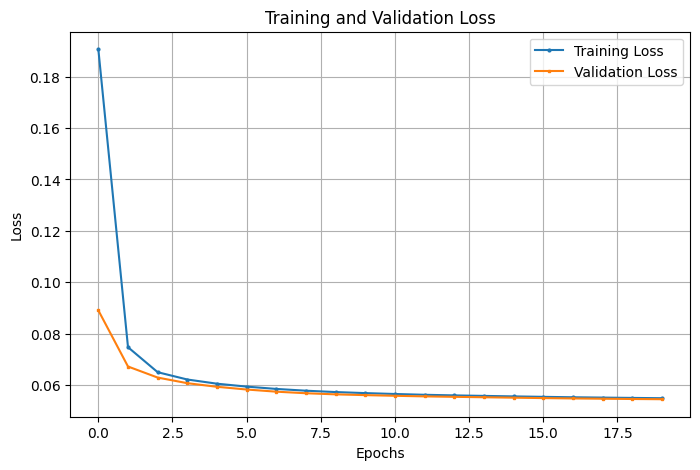

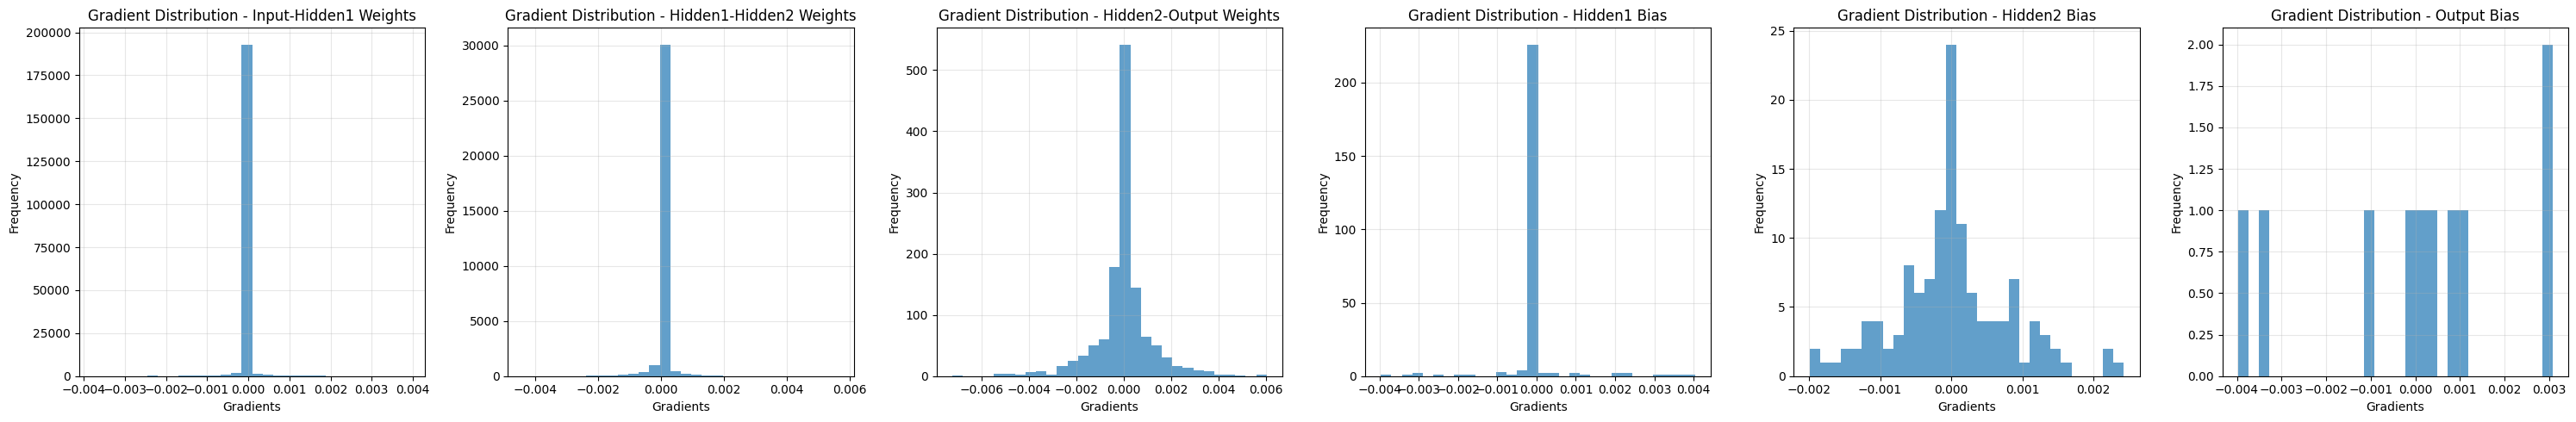

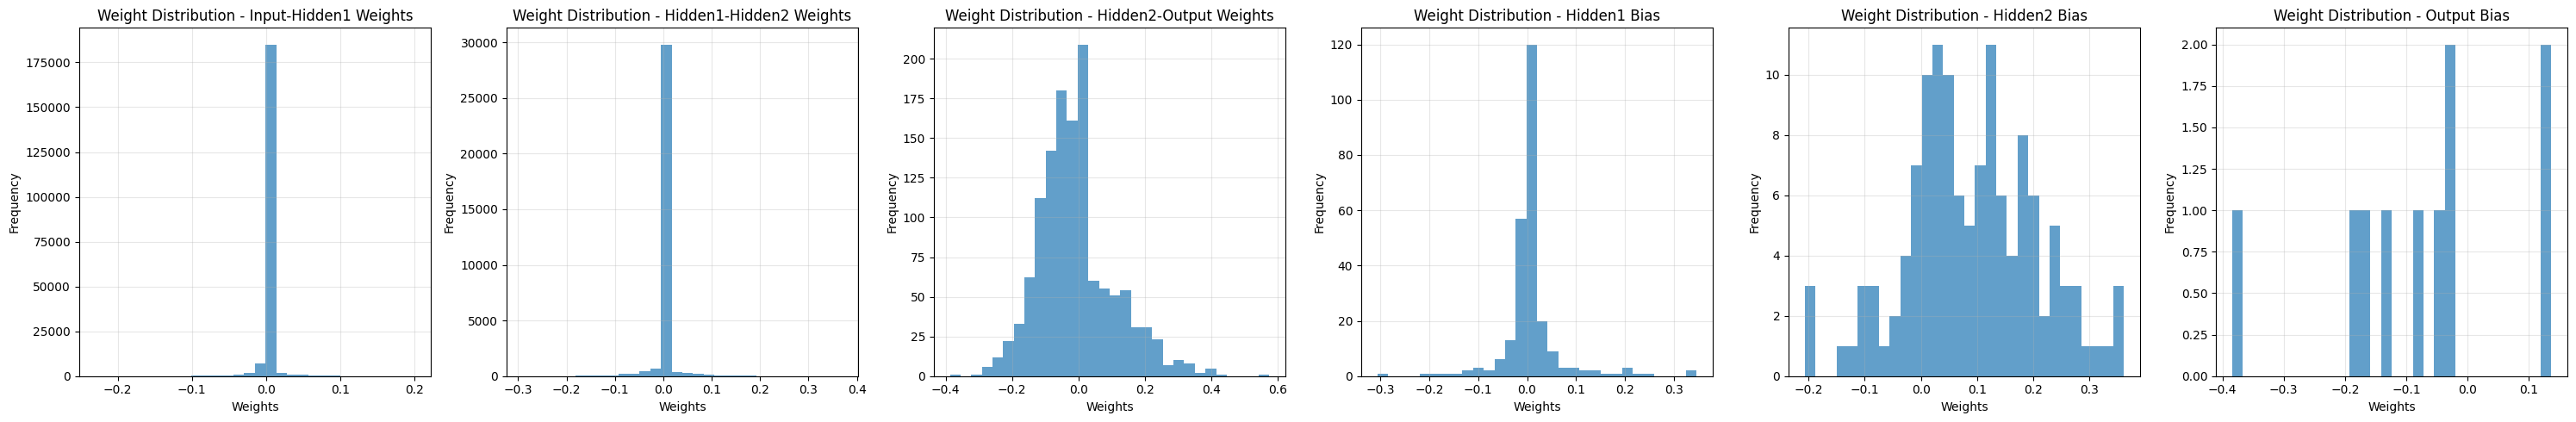

In [14]:
plotter.plot_training_history(ffnn6)
plotter.plot_gradient_distributions(ffnn6)
plotter.plot_weight_distributions(ffnn6)